In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import datetime

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

C:\Users\Anurag Rana\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [5]:
# Read Excel File using pandas
df=pd.read_excel('D:\FirstUniv\DataSet\marketing_campaign.xlsx')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [6]:
df.shape

(2240, 29)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

<AxesSubplot:xlabel='Response', ylabel='count'>

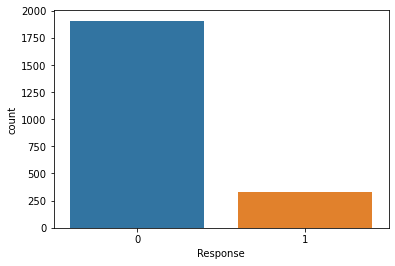

In [9]:
# Check the target is imbalanced
sns.countplot(df.Response)

In [10]:
# Calculate Age from Year_Birth Variable
df.Year_Birth=pd.to_datetime(df['Year_Birth'],format='%Y')
year_now=datetime.date.today().year
df['Age']=df['Year_Birth'].apply(lambda x:year_now-x.year)


In [11]:
#drop Year_Birth variable
df.drop('Year_Birth',axis=1,inplace=True)

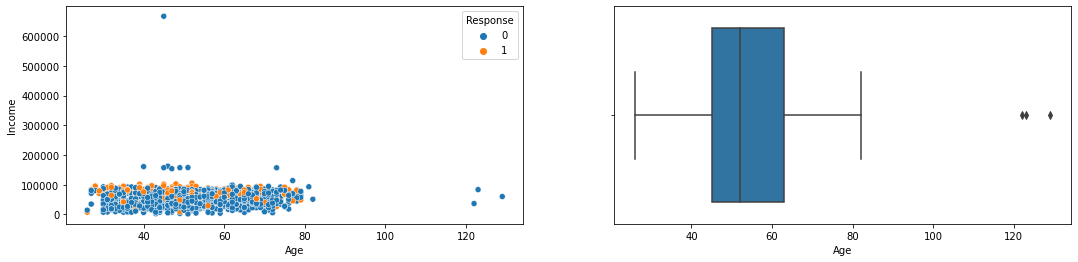

In [15]:
# Income spending by age
fig, ax =plt.subplots(1,2, figsize=(18,4))
sns.scatterplot(x='Age',y='Income',data=df,hue='Response',ax=ax[0])
sns.boxplot(x='Age', data=df, ax=ax[1])
plt.show()

In [18]:
# Calculate spending of Customers
df["spending"]=df.MntFishProducts + df.MntFruits+df.MntGoldProds+df.MntMeatProducts+df.MntSweetProducts+df.MntWines
# Remove spending Products
df.drop(["MntFishProducts","MntFruits","MntGoldProds","MntMeatProducts","MntSweetProducts","MntWines"],axis=1,inplace=True)

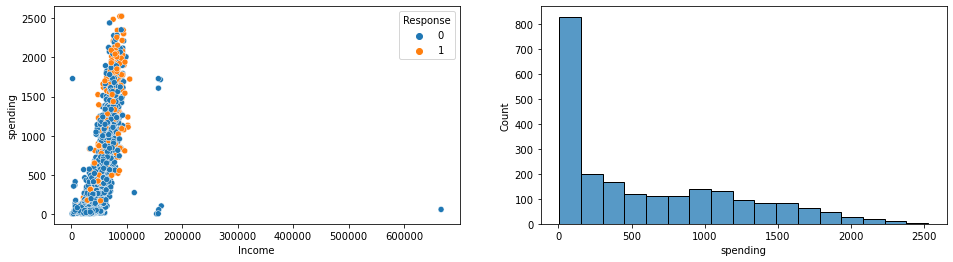

In [19]:
# Income and Spending
fig, ax=plt.subplots(1,2, figsize=(16,4))
sns.scatterplot(x='Income', y='spending', data=df, hue='Response',ax=ax[0])
sns.histplot(df.spending,ax=ax[1])
plt.show()

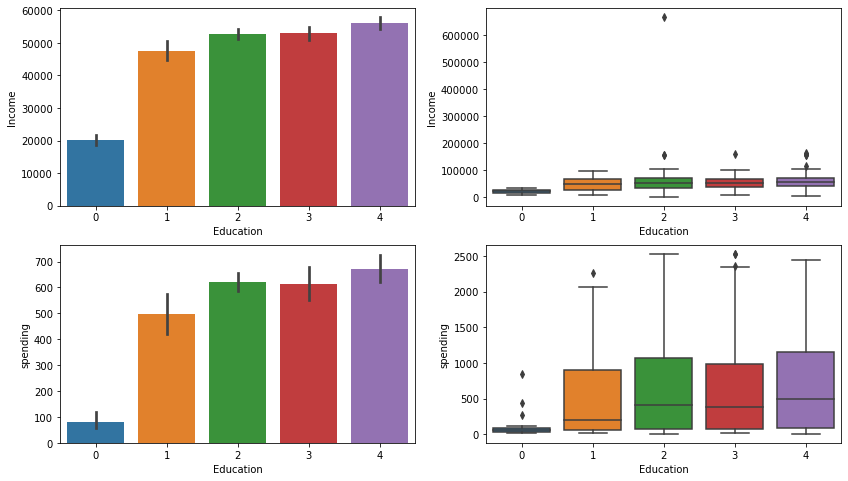

In [25]:
# Income and Spending on the basis of Qualification
fig, ax=plt.subplots(2,2,figsize=(14,8))
sns.barplot(x='Education',y='Income',data=df,ax=ax[0,0])
sns.boxplot(x='Education',y='Income',data=df,ax=ax[0,1])
sns.barplot(x='Education',y='spending',data=df,ax=ax[1,0])
sns.boxplot(x='Education',y='spending',data=df,ax=ax[1,1])
plt.show()

In [21]:
# Check Education Variable
df.Education=df.Education.map({'Basic':0,'2n Cycle':1,'Graduation':2,'Master':3,'PhD':4})

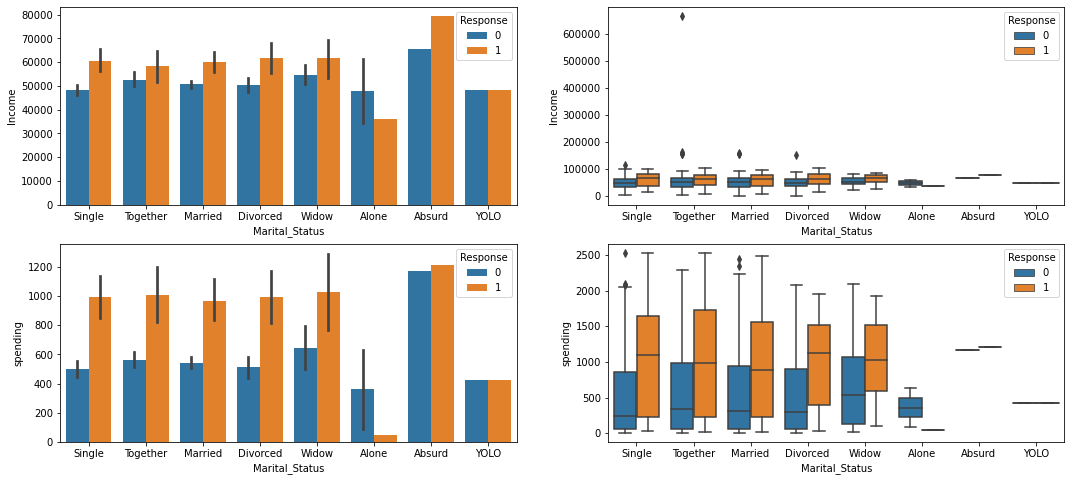

In [24]:
# Income and spending by Martial Status
fig, ax=plt.subplots(2,2,figsize=(18,8))
sns.barplot(x='Marital_Status',y='Income', data=df,hue='Response',ax=ax[0,0])
sns.boxplot(x='Marital_Status',y='Income', data=df,hue='Response',ax=ax[0,1])
sns.barplot(x='Marital_Status',y='spending', data=df,hue='Response',ax=ax[1,0])
sns.boxplot(x='Marital_Status',y='spending', data=df,hue='Response',ax=ax[1,1])
plt.show()

In [26]:
# Mapping of Marital_Status Variables Couple:0, Single:1
df.Marital_Status=df.Marital_Status.map({'Married':0,'Together':0,'Single':1,'Divorced':1,'Widow':1,'Alone':1,'Absurd':1,'YOLO':1})

<AxesSubplot:xlabel='Kidhome', ylabel='spending'>

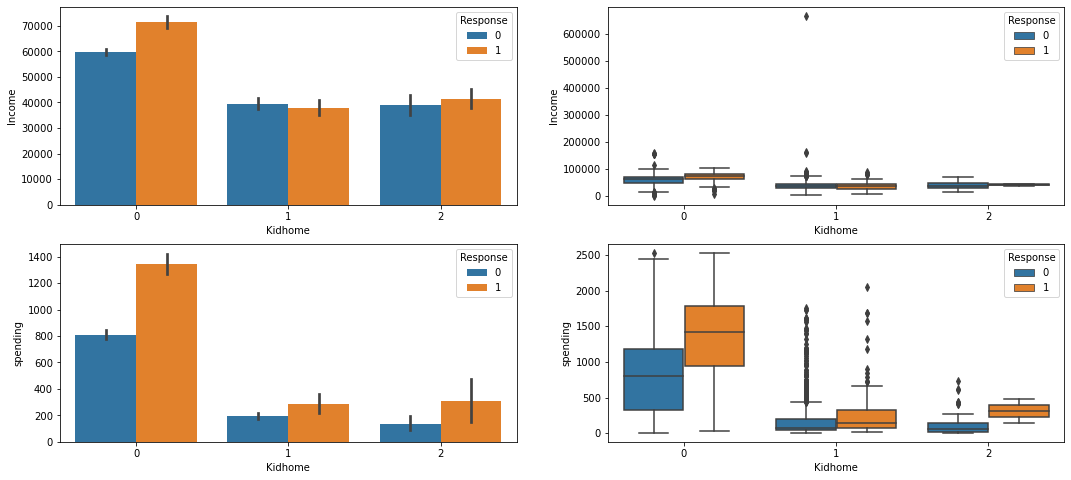

In [27]:
# Income and spending by Kidhome and TeenHome
fig, ax=plt.subplots(2,2,figsize=(18,8))
sns.barplot(x='Kidhome', y='Income',data=df,hue='Response',ax=ax[0,0])
sns.boxplot(x='Kidhome', y='Income',data=df,hue='Response',ax=ax[0,1])
sns.barplot(x='Kidhome', y='spending',data=df,hue='Response',ax=ax[1,0])
sns.boxplot(x='Kidhome', y='spending',data=df,hue='Response',ax=ax[1,1])

In [29]:
# drop Kidhome and Teen Home
df['has_kid']=np.where(df.Kidhome>0,1,0)
df['has_teen']=np.where(df.Teenhome>0,1,0)
df.drop(['Kidhome','Teenhome'],axis=1,inplace=True)

<AxesSubplot:xlabel='NumWebVisitsMonth', ylabel='spending'>

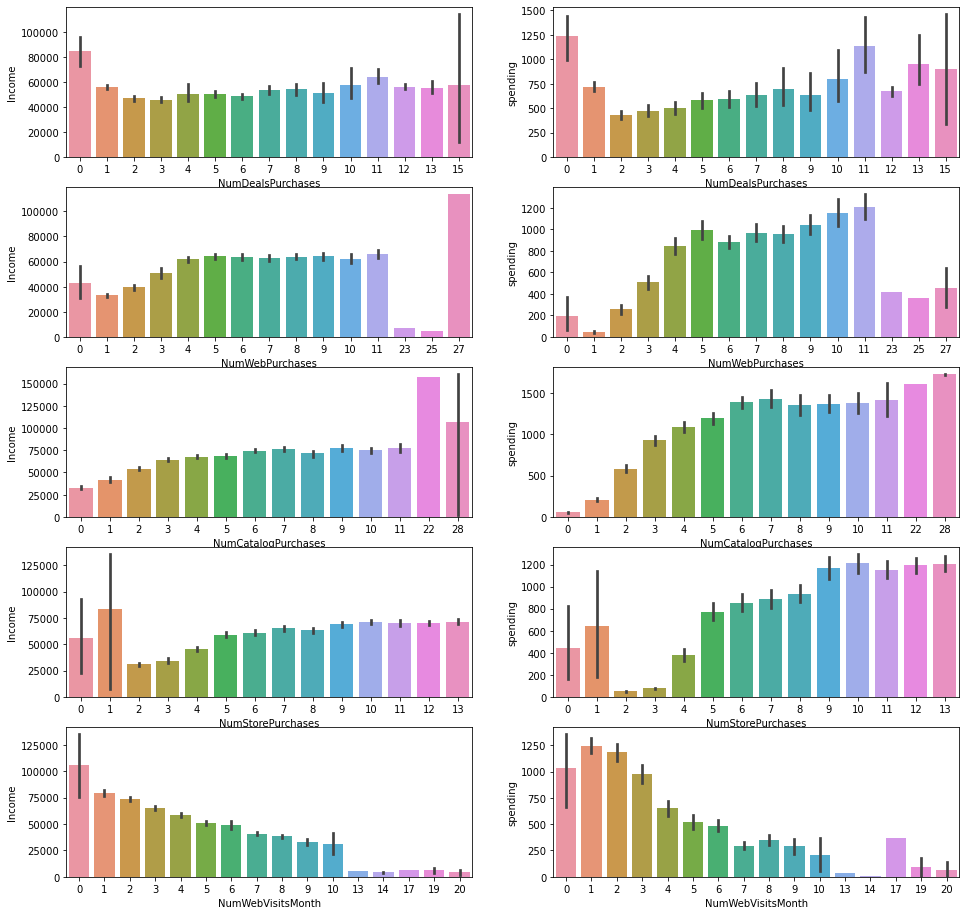

In [32]:
fig, ax=plt.subplots(5,2,figsize=(16,16))
sns.barplot(x='NumDealsPurchases',y='Income', data=df,ax=ax[0,0])
sns.barplot(x='NumDealsPurchases',y='spending', data=df,ax=ax[0,1])
sns.barplot(x='NumWebPurchases',y='Income', data=df,ax=ax[1,0])
sns.barplot(x='NumWebPurchases',y='spending', data=df,ax=ax[1,1])
sns.barplot(x='NumCatalogPurchases',y='Income', data=df,ax=ax[2,0])
sns.barplot(x='NumCatalogPurchases',y='spending', data=df,ax=ax[2,1])
sns.barplot(x='NumStorePurchases',y='Income', data=df,ax=ax[3,0])
sns.barplot(x='NumStorePurchases',y='spending', data=df,ax=ax[3,1])
sns.barplot(x='NumWebVisitsMonth',y='Income', data=df,ax=ax[4,0])
sns.barplot(x='NumWebVisitsMonth',y='spending', data=df,ax=ax[4,1])

In [33]:
# Conert the date of enrolment to datetime
df.Dt_Customer=pd.to_datetime(df.Dt_Customer)
# creating the feature from date of Enrolment
df['Year_Customer']=df['Dt_Customer'].apply(lambda x:x.year)
df['Month_Customer']=df['Dt_Customer'].apply(lambda x:x.month)
df['Day_Customer']=df['Dt_Customer'].apply(lambda x:x.day)

# Drop the Dt_Customer
df=df.drop('Dt_Customer',axis=1)

<AxesSubplot:xlabel='Day_Customer', ylabel='spending'>

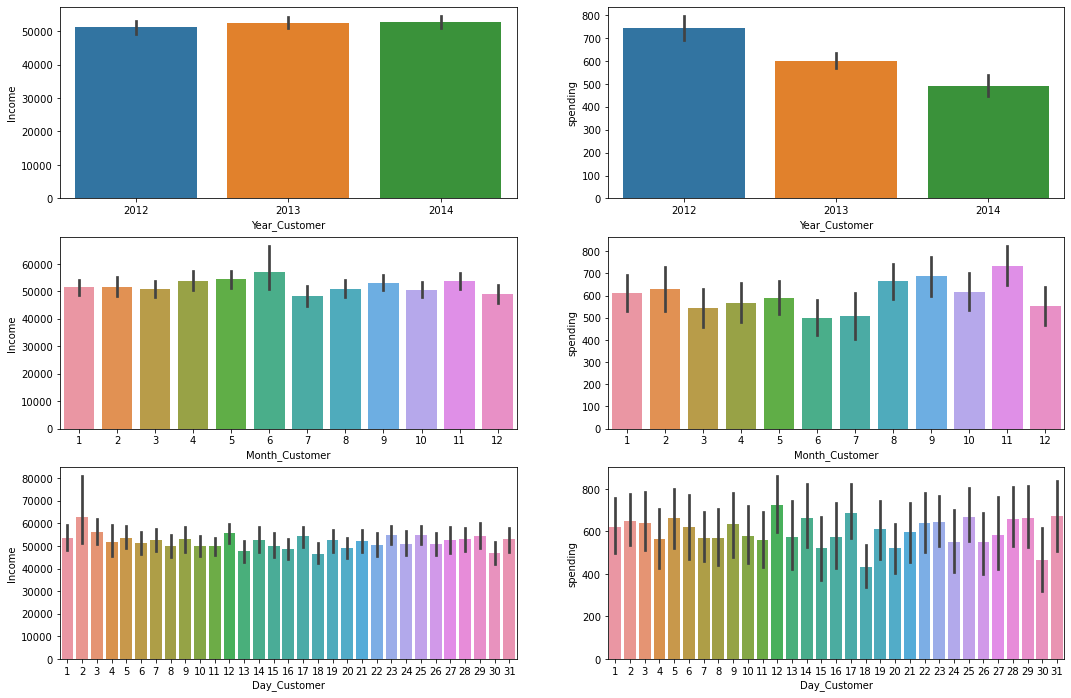

In [35]:
# Plotting the income and spending with the enrolment time

fig, ax =plt.subplots(3,2,figsize=(18,12))
sns.barplot(x='Year_Customer',y='Income',data=df, ax=ax[0,0])
sns.barplot(x='Year_Customer',y='spending',data=df, ax=ax[0,1])
sns.barplot(x='Month_Customer',y='Income',data=df, ax=ax[1,0])
sns.barplot(x='Month_Customer',y='spending',data=df, ax=ax[1,1])
sns.barplot(x='Day_Customer',y='Income',data=df, ax=ax[2,0])
sns.barplot(x='Day_Customer',y='spending',data=df, ax=ax[2,1])

In [37]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Education,2240.0,2.460268,1.004337,0.0,2.00,2.0,3.00,4.0
Marital_Status,2240.0,0.355357,0.478728,0.0,0.00,0.0,1.00,1.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
NumDealsPurchases,2240.0,2.325000,1.932238,0.0,1.00,2.0,3.00,15.0
NumWebPurchases,2240.0,4.084821,2.778714,0.0,2.00,4.0,6.00,27.0
NumCatalogPurchases,2240.0,2.662054,2.923101,0.0,0.00,2.0,4.00,28.0
NumStorePurchases,2240.0,5.790179,3.250958,0.0,3.00,5.0,8.00,13.0
NumWebVisitsMonth,2240.0,5.316518,2.426645,0.0,3.00,6.0,7.00,20.0


In [41]:
# Check the variable has only one value
for col in df.columns:
    if len(df[col].value_counts())==1:
        print(col)

Z_CostContact
Z_Revenue


In [43]:
# Drop Z_CostContact, Z_Revenue
df=df.drop(['Z_CostContact','Z_Revenue'],axis=1)

Outliers Handling


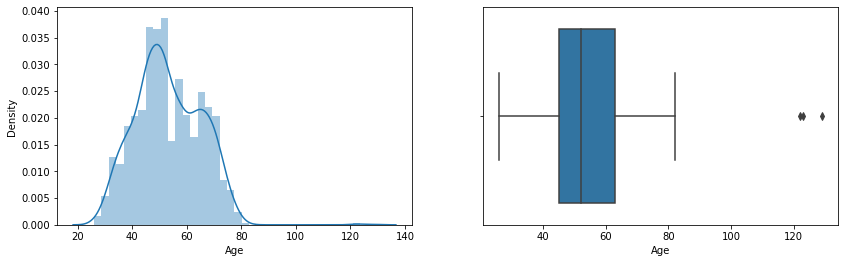

In [44]:
# Outliers in Age variable
fig, ax=plt.subplots(1,2,figsize=(14,4))
sns.distplot(df.Age, ax=ax[0])
sns.boxplot(df.Age, ax=ax[1])
plt.show()

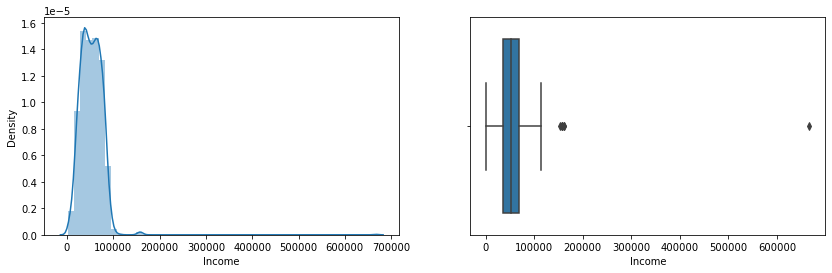

In [45]:
# Outliers in Income variable
fig, ax=plt.subplots(1,2,figsize=(14,4))
sns.distplot(df.Income, ax=ax[0])
sns.boxplot(df.Income, ax=ax[1])
plt.show()

In [47]:
# Remove the outliers before handling the missing values
df=df[df['Income']<200000]
df=df[df.Age<100]

In [49]:
# Fill the null values with the median
df.Income-df.Income.fillna(df.Income.median(),axis=0)

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
2235    0.0
2236    0.0
2237    0.0
2238    0.0
2239    0.0
Name: Income, Length: 2212, dtype: float64

In [51]:
# Check Duplicate
df.duplicated().sum()

0

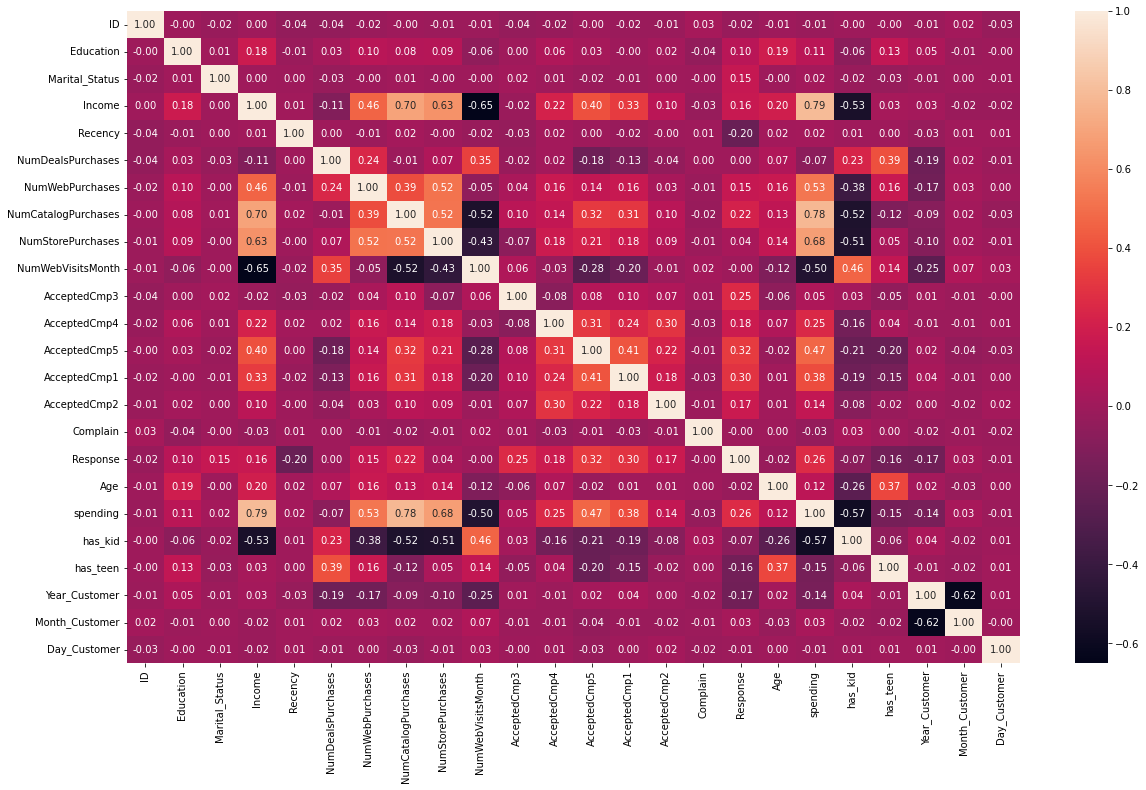

In [52]:
# Check correlation b/w variables through heatmap
corr=df.corr()
plt.figure(figsize=(20,12))
sns.heatmap(corr,annot=True,fmt='.2f')
plt.show()

In [53]:
# Hieghest Correlation
df.corr()['Response'].sort_values(ascending=False)

Response               1.000000
AcceptedCmp5           0.324891
AcceptedCmp1           0.297212
spending               0.264443
AcceptedCmp3           0.253849
NumCatalogPurchases    0.219912
AcceptedCmp4           0.180032
AcceptedCmp2           0.169234
Income                 0.161387
NumWebPurchases        0.151084
Marital_Status         0.150577
Education              0.098970
NumStorePurchases      0.035563
Month_Customer         0.032063
NumDealsPurchases      0.003226
Complain              -0.000145
NumWebVisitsMonth     -0.002625
Day_Customer          -0.011421
Age                   -0.020937
ID                    -0.021112
has_kid               -0.072095
has_teen              -0.161355
Year_Customer         -0.172058
Recency               -0.200114
Name: Response, dtype: float64

In [54]:
df.head()

,ID,Education,Marital_Status,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,...,AcceptedCmp2,Complain,Response,Age,spending,has_kid,has_teen,Year_Customer,Month_Customer,Day_Customer
0,5524,2,1,58138.0,58,3,8,10,4,7,...,0,0,1,65,1617,0,0,2012,9,4
1,2174,2,1,46344.0,38,2,1,1,2,5,...,0,0,0,68,27,1,1,2014,3,8
2,4141,2,0,71613.0,26,1,8,2,10,4,...,0,0,0,57,776,0,0,2013,8,21
3,6182,2,0,26646.0,26,2,2,0,4,6,...,0,0,0,38,53,1,0,2014,2,10
4,5324,4,0,58293.0,94,5,5,3,6,5,...,0,0,0,41,422,1,0,2014,1,19


Seperate the feature and target variable

In [55]:
y = df.Response
X = df.drop('Response', axis=1)

# shape of X and y
print('Shape of X: ',X.shape)
print('Shape of y: ',y.shape)

Shape of X:  (2212, 23)
Shape of y:  (2212,)


In [56]:
# dividing the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print('Shape of train: ','\n','X_train',X_train.shape,'y_train',y_train.shape)
print('Shape of test: ','\n','X_test',X_test.shape,'y_test',y_test.shape)

Shape of train:  
 X_train (1482, 23) y_train (1482,)
Shape of test:  
 X_test (730, 23) y_test (730,)


Modeling

In [57]:
results = pd.DataFrame(y_test)

In [58]:
lr = LogisticRegression()
lr_fit = lr.fit(X_train,y_train)
print('Train score',lr_fit.score(X_train,y_train))

# prediction
pred_lr = lr_fit.predict(X_test)
results['logReg'] = pred_lr
# score
print('Test Score: ',accuracy_score(y_test,pred_lr))
print('F1 Score: ',f1_score(y_test, pred_lr))
confusion_matrix(y_test,pred_lr)

Train score 0.8630229419703104
Test Score:  0.8479452054794521
F1 Score:  0.2929936305732484


array([[596,  13],
       [ 98,  23]], dtype=int64)

In [59]:
lr = LogisticRegression()
lr_fit = lr.fit(X_train,y_train)
print('Train score',lr_fit.score(X_train,y_train))

# prediction
pred_lr = lr_fit.predict(X_test)
results['logReg'] = pred_lr
# score
print('Test Score: ',accuracy_score(y_test,pred_lr))
print('F1 Score: ',f1_score(y_test, pred_lr))
confusion_matrix(y_test,pred_lr)

Train score 0.8630229419703104
Test Score:  0.8479452054794521
F1 Score:  0.2929936305732484


array([[596,  13],
       [ 98,  23]], dtype=int64)